In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
happiness_df = pd.read_csv('whr.csv')

In [16]:
print(happiness_df.head())

  Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.370           0.451   
1  Afghanistan  2009        4.402               7.540           0.552   
2  Afghanistan  2010        4.758               7.647           0.539   
3  Afghanistan  2011        3.832               7.620           0.521   
4  Afghanistan  2012        3.783               7.705           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                             50.80                         0.718       0.168   
1                             51.20                         0.679       0.190   
2                             51.60                         0.600       0.121   
3                             51.92                         0.496       0.162   
4                             52.24                         0.531       0.236   

   Perceptions of corruption  Positive affect  Negative affect  
0        

In [17]:
happiness_df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [18]:
print(happiness_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB
None


In [19]:
print("Are There Missing Data? :",happiness_df.isnull().any().any())
print(happiness_df.isnull().sum())

Are There Missing Data? : True
Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64


In [20]:
happiness_df['Log GDP per capita'] = happiness_df.groupby('Country name')['Log GDP per capita'].transform(lambda x: x.fillna(x.mean()))
happiness_df['Social support'] = happiness_df.groupby('Country name')['Social support'].transform(lambda x: x.fillna(x.mean()))

In [21]:
happiness_df['Log GDP per capita'].fillna(happiness_df['Log GDP per capita'].mean(), inplace=True)
happiness_df['Social support'].fillna(happiness_df['Social support'].median(), inplace=True)
happiness_df['Healthy life expectancy at birth'].fillna(happiness_df['Healthy life expectancy at birth'].median(), inplace=True)
happiness_df['Freedom to make life choices'].fillna(happiness_df['Freedom to make life choices'].median(), inplace=True)
happiness_df['Generosity'].fillna(happiness_df['Generosity'].mean(), inplace=True)
happiness_df['Perceptions of corruption'].fillna(happiness_df['Perceptions of corruption'].mean(), inplace=True)
happiness_df['Positive affect'].fillna(happiness_df['Positive affect'].mean(), inplace=True)
happiness_df['Negative affect'].fillna(happiness_df['Negative affect'].mean(), inplace=True)
happiness_df['Country name'].fillna(method='ffill', inplace=True)
happiness_df['year'].fillna(method='bfill', inplace=True)

In [22]:
print("Are There Missing Data? :",happiness_df.isnull().any().any())
print(happiness_df.isnull().sum())

Are There Missing Data? : False
Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64





### Analyze the distribution of happiness scores and identify countries with significant changes over time




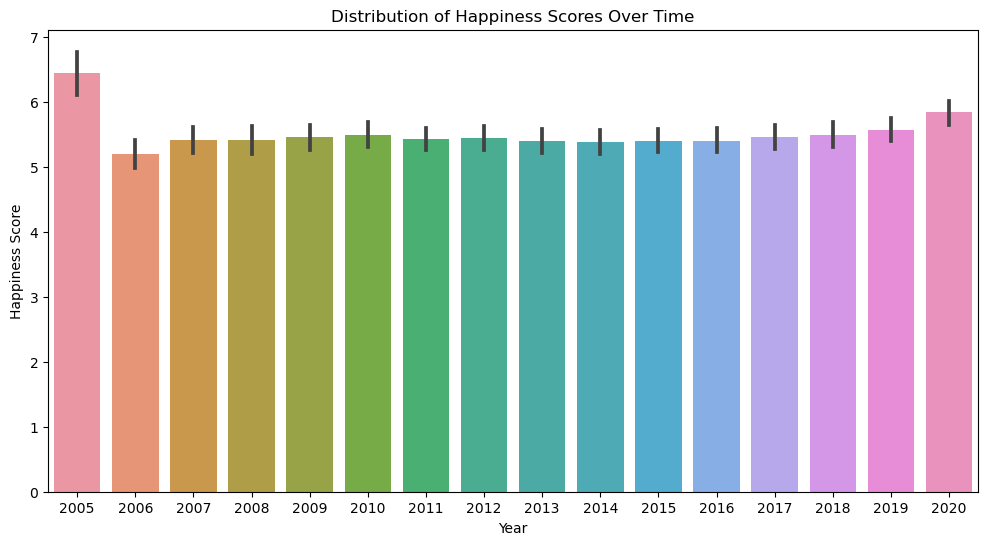

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='Life Ladder', data=happiness_df)
sns.set_palette("Greens")
plt.title('Distribution of Happiness Scores Over Time')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.show()




### Investigate correlations between different factors influencing happiness




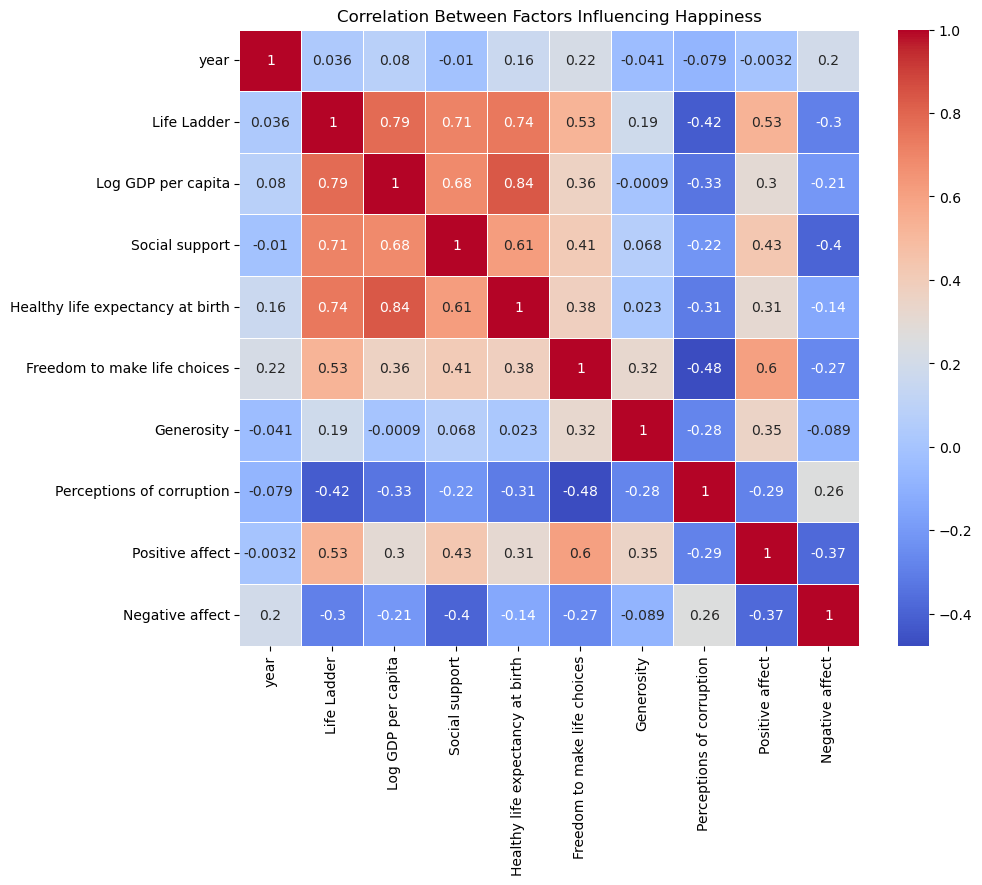

In [24]:
sns.set_palette("Greens")
numeric_columns = happiness_df.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Between Factors Influencing Happiness')
plt.show()




### Perform a regional analysis to identify patterns or outliers




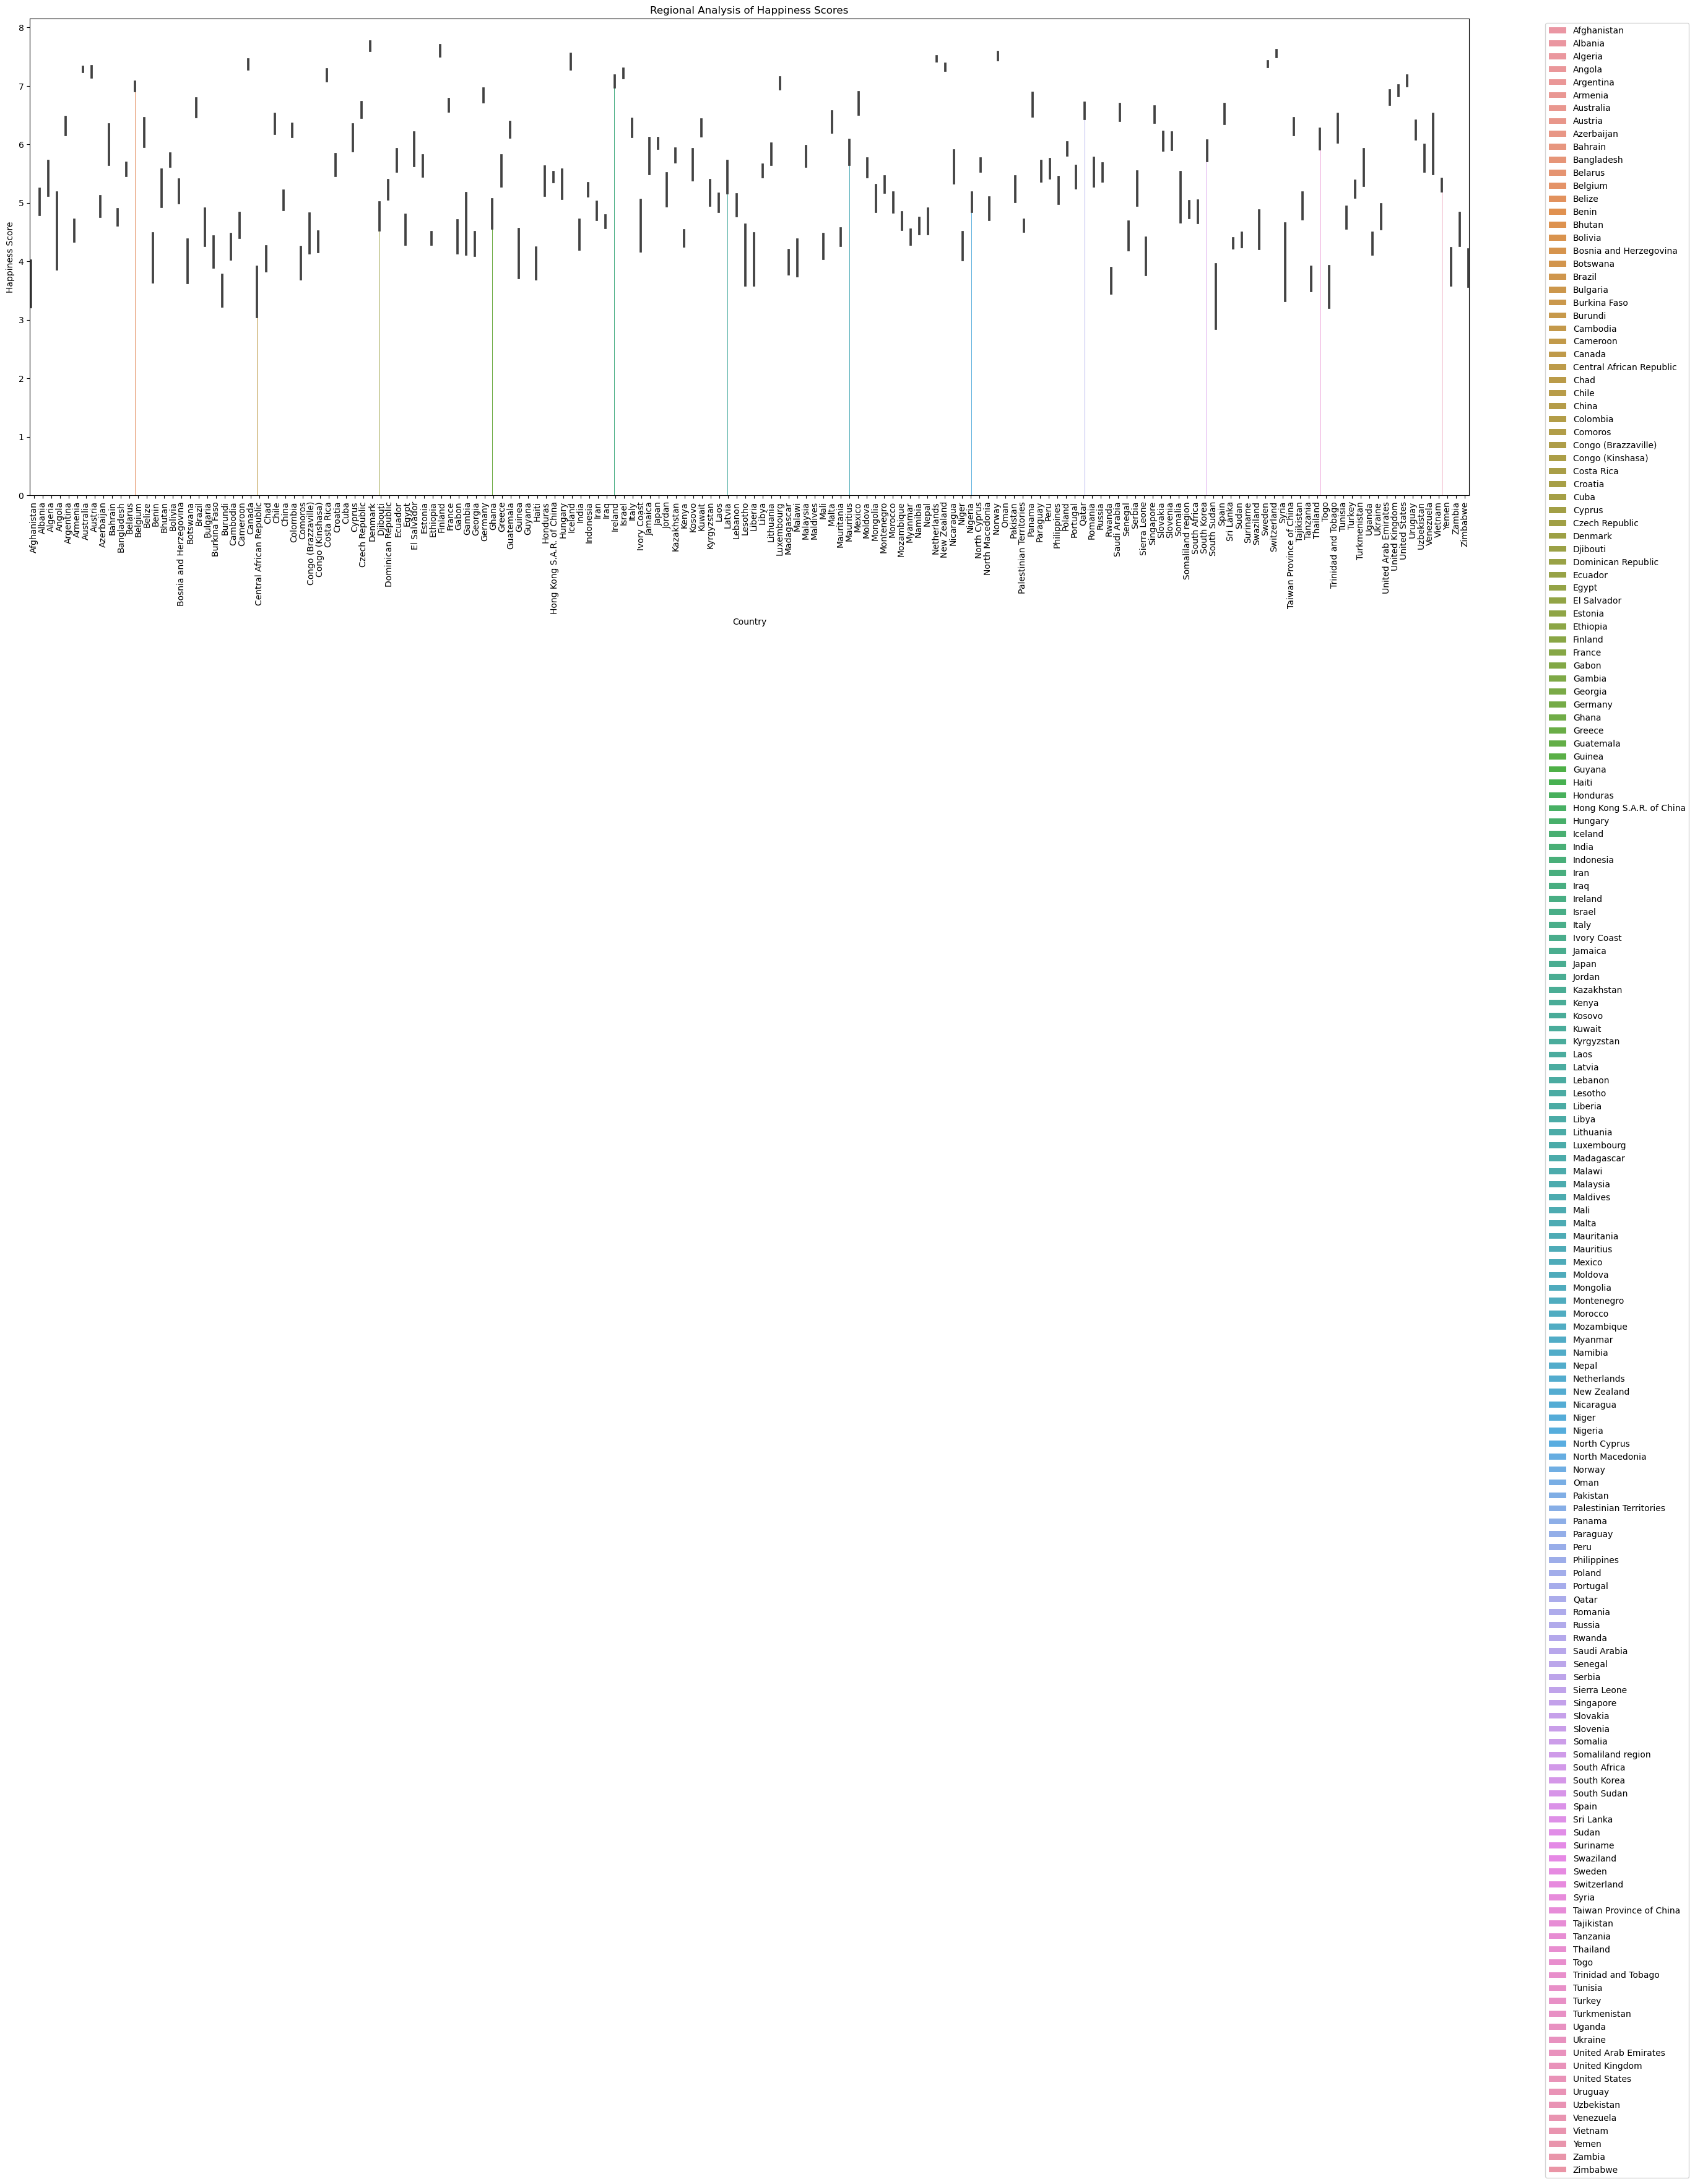

In [25]:
sns.set_palette("Reds")
plt.figure(figsize=(30, 10)) 
sns.barplot(x='Country name', y='Life Ladder', data=happiness_df, hue='Country name')
plt.title('Regional Analysis of Happiness Scores')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=90)  
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.show()




### Utilize advanced grouping and aggregation techniques for insightful summaries




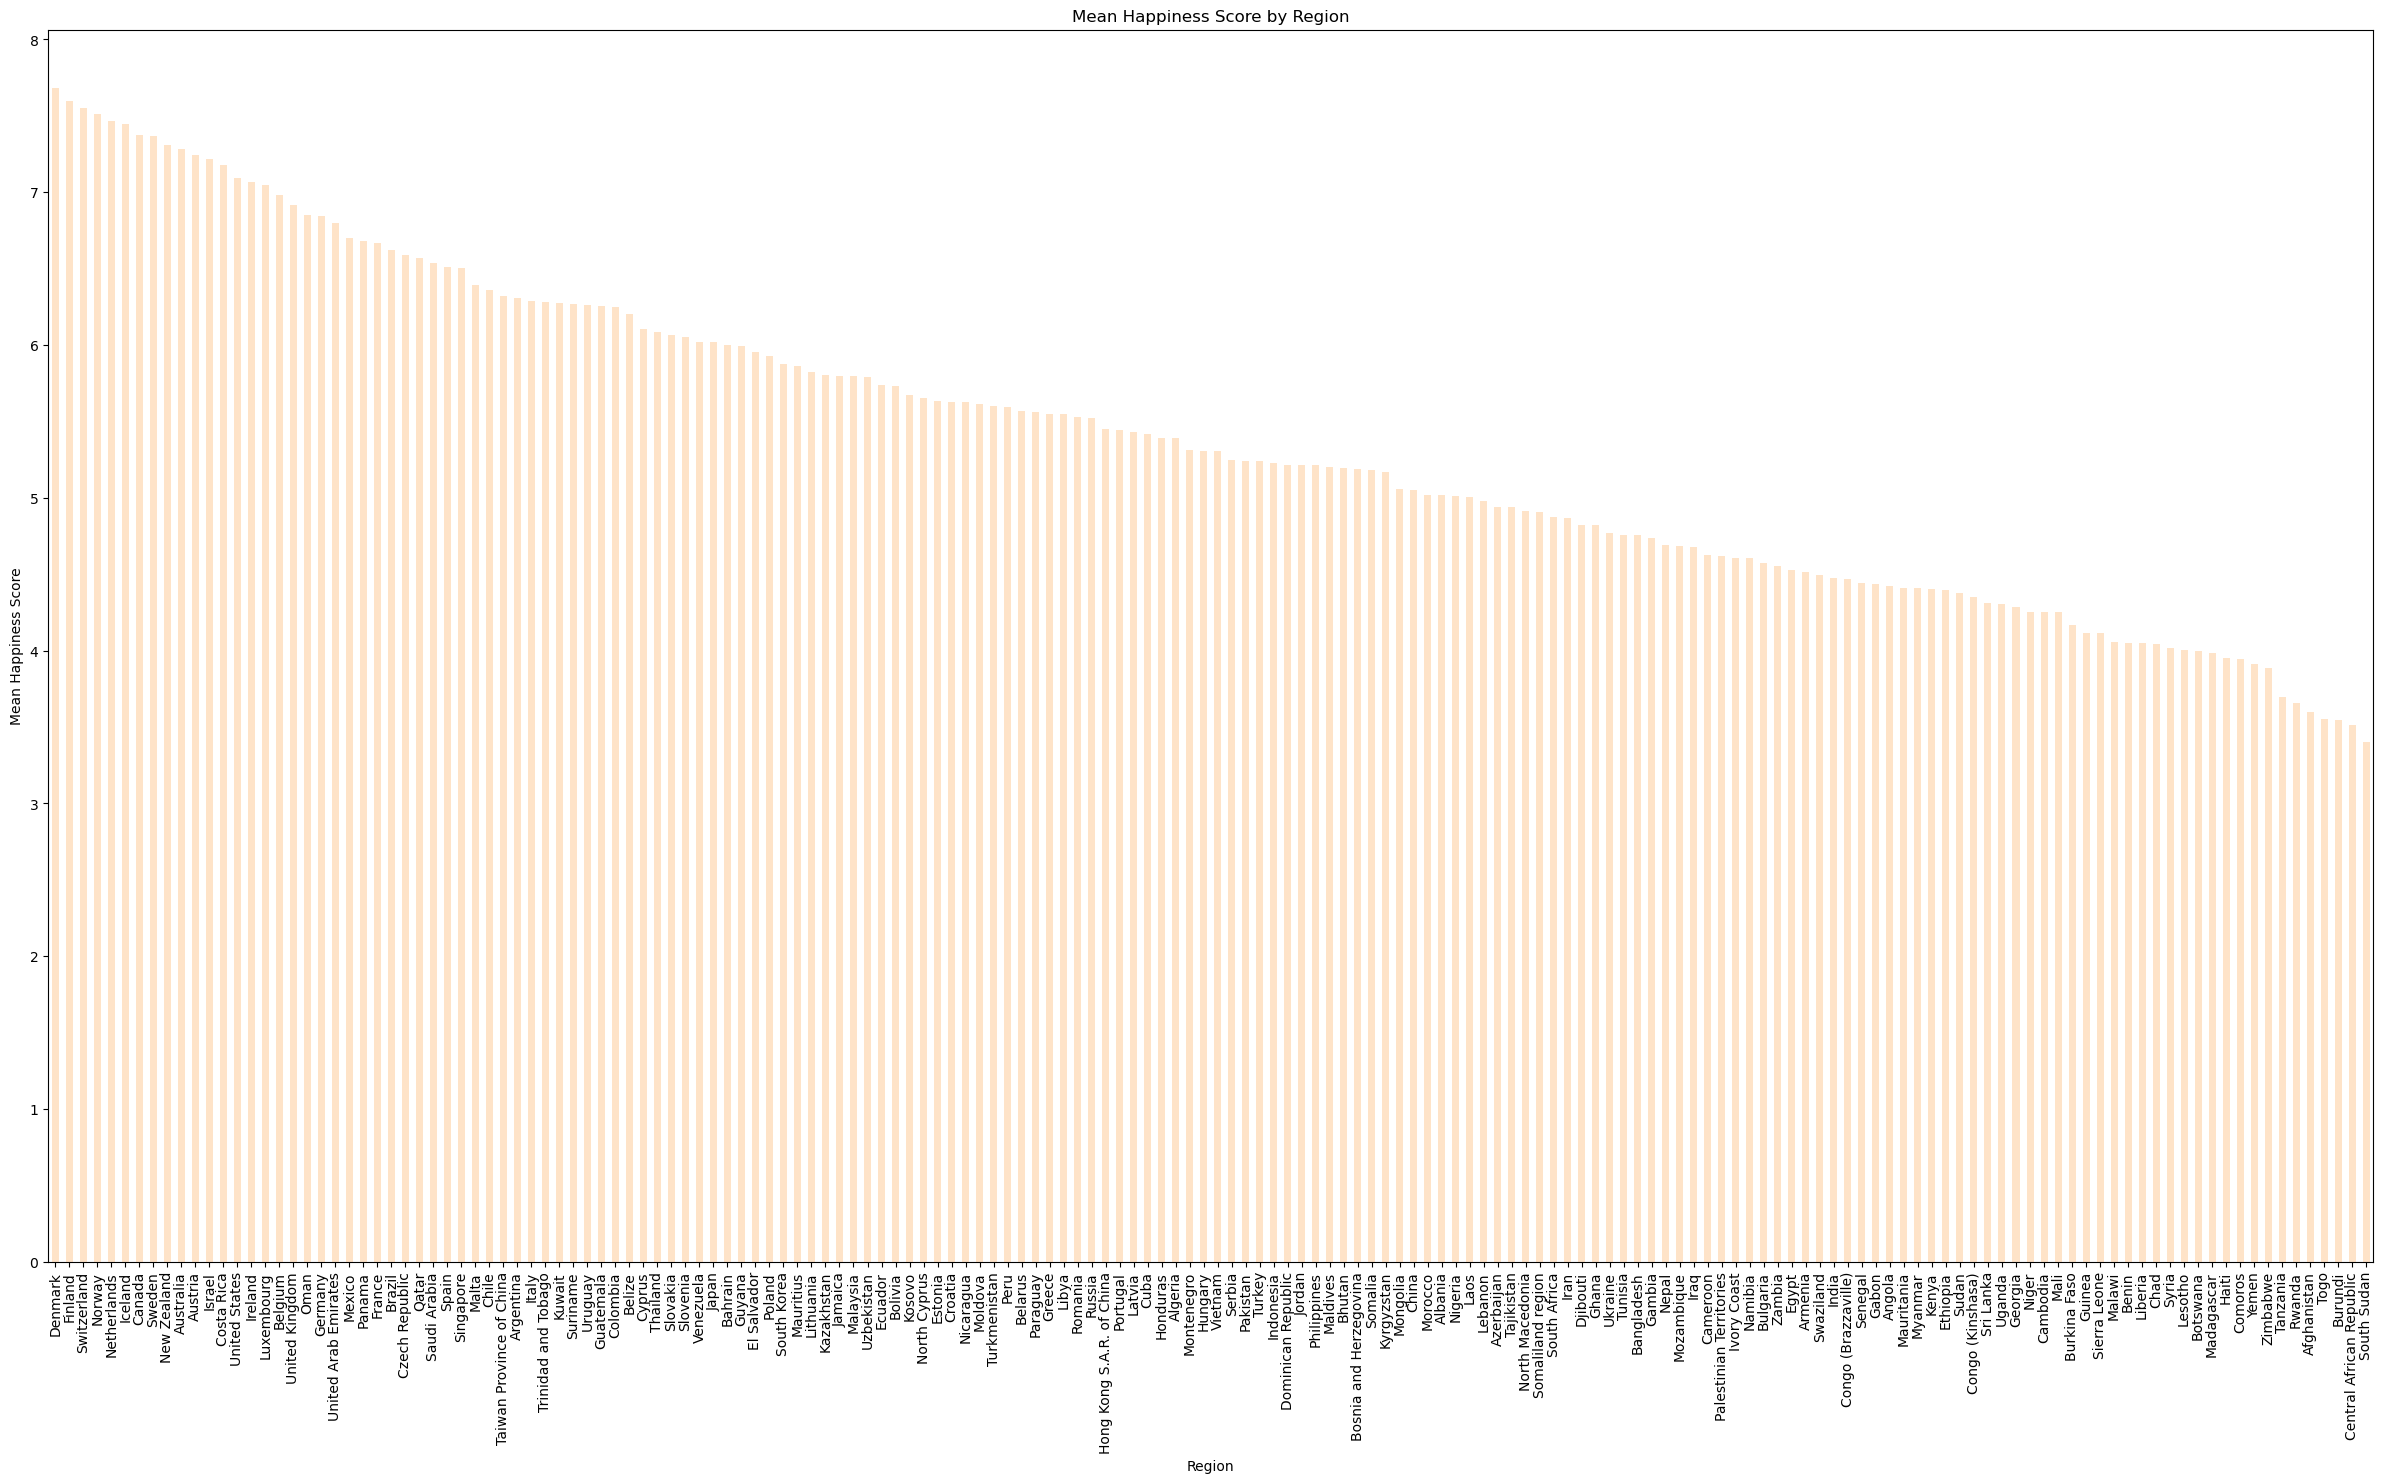

In [26]:
sns.set_palette("Oranges")
region_happiness = happiness_df.groupby('Country name')['Life Ladder'].mean().sort_values(ascending=False)
plt.figure(figsize=(30, 16))
region_happiness.plot(kind='bar')
plt.title('Mean Happiness Score by Region')
plt.xlabel('Region')
plt.ylabel('Mean Happiness Score')
plt.show()